### Customization
Tensorflow 2.0에 맞게 다시 Tensorflow를 살펴볼 필요가 있다고 느껴져서 <a href="https://www.tensorflow.org/?hl=ko">Tensorflow 정식 홈페이지</a>에 나와있는 예제부터 전반적인 Tensorflow 사용법을 먼저 익히는 Post가 된다.  
<br>

#### 필요한 Library Import

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Gpu 사용 가능 여부 출력
print(tf.test.is_gpu_available())

True


### Layers
Tensorflow는 Keras API를 사용할 수 있고 이러한 Keras API 중 <code>tf.keras.layers</code>를 활용하여 쉽게 Layer를 구성할 수 있다.  
위에서 사용한 Keras API는 하나의 Object로서 Layer를 반환하게 된다.  

Keras의 Layers는 다음과 같은 정보로서 상세 정보를 확인할 수 있다.
- <code>layers.variables</code>: Layers의 w(weight), b(bias)를 출력
- <code>layers.trainable_variables</code>: Layers의 Training 가능한 w(weight), b(bias)를 출력
- <code>layer.kernel</code>: Layers의 w(weight)를 출력
- <code>layer.bias</code>: Layers의 b(bias)를 출력

**기본적으로 Layer의 Variable은 자동으로 초기화가 된다.(Tensorflow 1.x처럼 초기화 선언을 하지 않아도 된다.)**

In [2]:
# Layer 선언
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))
# 선언한 Layer의 Input 부여
output = layer(tf.zeros([10, 5]))
print('Layer Output 출력')
print(output)
print()

# Layer 상세 정보 출력
print('Layer 상세 정보 출력')

# Layer Trainable Variable 출력
print('Layer Trainable Variable 출력')
print(layer.trainable_variables)
print()

# Layer Variable 출력
print('Layer Variable 출력')
print(layer.variables)
print()

# Layer Kernel 출력
print('Layer Kernel 출력')
print(layer.kernel)
print()

# Layer Bias 출력
print('Layer Bias 출력')
print(layer.bias)

Layer Output 출력
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)

Layer 상세 정보 출력
Layer Trainable Variable 출력
[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.49530905, -0.27961993,  0.07997888, -0.06890565,  0.62559813,
         0.22413027,  0.5704424 , -0.078982  , -0.47299433,  0.4632601 ],
       [-0.20451835,  0.4138841 , -0.5363495 ,  0.4727065 ,  0.02015269,
        -0.6287243 ,  0.3744126 , -0.5255875 , -0.3383796 ,  0.37277132],
       [-0.36810887,  0.00395703,  0.48337704,  0.28826225, -0.35905218,
         0.26025045,  0.41176158, -0.58899885, -0.15647706, -0.13678929],
       [-0.45444426, -0.3293416 ,  0.11857456,  0.45254236

#### Implementing custom layers
사용자가 직접 Layer를 정의할 수 있다.  
<code>tf.keras.layers.layer</code>를 상속받게 되고 상속받은 것 에서 사용하는 Function은 각각 다음과 같은 의미가 있다.
- <code>init</code>: 필요한 매개변수를 입력 받는다.
- <code>build</code>: 텐서의 크기를 얻고 남은 초기화를 진행할 수 있다.
- <code>call</code>: 정방향 계산(forward computation)을 진행한다.



In [3]:
class MyDenseLayer(tf.keras.layers.Layer):
    # 필요한 매개변수를 입력 받는다.
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    
    # 변수를 정의한다.
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                        shape=[int(input_shape[-1]),
                                               self.num_outputs])
    # Forward를 진행한다.        
    def call(self, input):
        return tf.matmul(input, self.kernel)

layer = MyDenseLayer(3)
print(layer(tf.zeros([10, 5])))
print(layer.trainable_variables)

Instructions for updating:
Please use `layer.add_weight` method instead.
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(10, 3), dtype=float32)
[<tf.Variable 'my_dense_layer/kernel:0' shape=(5, 3) dtype=float32, numpy=
array([[ 0.26051825,  0.6137808 ,  0.4339798 ],
       [ 0.5461435 ,  0.22355396, -0.29373354],
       [ 0.83919996,  0.28862697, -0.12702477],
       [-0.61377275, -0.2543987 , -0.3983108 ],
       [ 0.6483756 , -0.7901958 , -0.79051566]], dtype=float32)>]


#### Models: Composing layers
<code>tf.keras.Model</code>을 상속받아 Model을 정의하게 된다.  
이러헥 정의된 Model은 Model.fit(), Model.evaluate(), Model.save등 Keras Model에서 사용할 수 있는 Function을 사용할 수 있다.

In [4]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])
print('Model Output')
print(block(tf.zeros([1, 2, 3, 3])))
print()

print('Model Trainable Variables Name')
print([x.name for x in block.trainable_variables])
print()

print('self.conv2a(input_tensor) Trainable Variable Name')
print(block.trainable_variables[0])
print(block.trainable_variables[1])

Model Output
tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)

Model Trainable Variables Name
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/batch_normalization/gamma:0', 'resnet_identity_block/batch_normalization/beta:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/batch_normalization_1/gamma:0', 'resnet_identity_block/batch_normalization_1/beta:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0', 'resnet_identity_block/batch_normalization_2/gamma:0', 'resnet_identity_block/batch_normalization_2/beta:0']

self.conv2a(input_tensor) Trainable Variable Name
<tf.Variable 'resnet_identity_block/conv2d/kernel:0' shape=(1, 1, 3, 1) dtype=float32, numpy=
array([[[[-0.9847094 ],
         [-0.1468122 ],
         [-0.47501415]]]], dtype=float32)>
<tf.Variabl

위와 같은 Code는 <code>tf.keras.Sequential</code>을 사용하여 짧고 간결하게 구현할 수 있다.  
많은 ML Model Code를 살펴보게 되면 Layer들이 반복되는 것을 알 수 있다.  
개인적인 경험으로는 Keras에서 지원하는 Layer들을 활용하여 Model을 구성하는 것에 대해서 한계점을 느껴서 Layer를 Customizing하는 것은 전처리 단계외에는 없었던 것 같다.

In [5]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: id=754, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

### Custom training
Tensorflow 2.0에서 Model을 Customizing하는 법도 배웠고 <a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(6)/#eager-execution">Eager execution</a>에서는 Gradient를 Customizing하는 법을 배웠다. 이미 Eager execution에서 Customizing하여 Training을 하는 법을 배웠으나 이번 Post에서는 다시 한번 복습하는 의미로서 Custom training에 대해서 배운다.  
<br>

#### Tensor Customizing
Tensor는 상태가 없고, 변경 불가능한(immutable stateless) 객체이다.  
이러한 Tensor에 직접적으로 연산을 하거나 Tensorflow에서 재공하는 <code>tf.assign</code>으로서 새로운 값을 주거나, 혹은 <code>tf.square</code>등으로 Tensor의 값을 특정 연산을 통하여 변경할 수 있다.

In [6]:
# 파이썬 구문 사용
x = tf.zeros([10, 10])
x += 2  # 이것은 x = x + 2와 같으며, x의 초기값을 변경하지 않습니다.
print(x)
print()


v = tf.Variable(1.0)
print('v = tf.Variable(1.0) == 1.0?: ', v.numpy() == 1.0)

# 값을 재배열합니다.
v.assign(3.0)
print('v.assign(3.0) == 3.0?: ', v.numpy() == 3.0)

# tf.square()와 같은 텐서플로 연산에 `v`를 사용하고 재할당합니다. 
v.assign(tf.square(v))
print('v.assign(tf.square(v)) == 9.0?: ', v.numpy() == 9.0)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)

v = tf.Variable(1.0) == 1.0?:  True
v.assign(3.0) == 3.0?:  True
v.assign(tf.square(v)) == 9.0?:  True


#### Example: Fit a linear model
간단한 Linear Model을 Customizing하고 Training을 실시한다.  
다음의 과정으로 이루워진다.
1. Define the model
2. Define a loss function
3. Obtain training data
4. Run through the training data and use an "optimizer" to adjust the variables to fit the data

<br>

#### Define the model
간단한 Linear Model인 y=Wx+b를 선언한다.

In [7]:
class Model(object):
    def __init__(self):
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

print(model(3.0).numpy()) # 3*5 + 0 = 15

15.0


#### Define a loss function
L2 Loss Function을 정의한다.

In [8]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

#### Obtain training data
y=3x+2+noise 의 Data의 분포로서 Dataset을 생성한다.

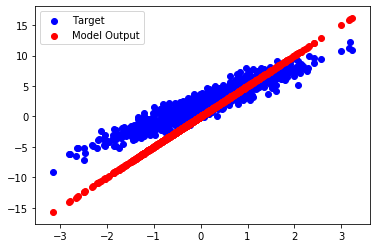

Current loss: 8.424005


In [9]:
# Data 선언
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

# Visualization 확인
plt.scatter(inputs, outputs, c='b',label='Target')
plt.scatter(inputs, model(inputs), c='r',label='Model Output')
plt.legend()
plt.show()

# Not Training Model(y=5x) Loss Function 확인
print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

#### Define a training loop
실질적인 Model의 Weight Update를 위한 Train()과 Epoch 횟수만큼 Training을 진행하게 된다.  
<code>tf.GradientTape()</code>를 통하여 실질적인 미분값을 구한다.  
Gradient Descent의 식을 살펴보게 되면 다음과 같다.  
<p>$$\theta = \theta - \alpha*\frac{\partial J(\theta)}{\partial \theta}$$</p>

아래 Code를 살펴보게 되면 위와 같은 식을 <code>t.gradient(current_loss, [model.W, model.b])</code>를 통하여 <span>$\frac{\partial J(\theta)}{\partial \theta}$</span>값을 구한뒤 <code>model.W.assign_sub(learning_rate * dW)</code>를 통하여 <span>$\theta = \theta - \alpha*\frac{\partial J(\theta)}{\partial \theta}$</span>를 구현 하였다.

Epoch  0: W=5.00 b=0.00, loss=8.42400
Epoch  1: W=4.63 b=0.38, loss=5.86161
Epoch  2: W=4.33 b=0.69, loss=4.17756
Epoch  3: W=4.09 b=0.94, loss=3.07069
Epoch  4: W=3.89 b=1.14, loss=2.34313
Epoch  5: W=3.72 b=1.31, loss=1.86487
Epoch  6: W=3.59 b=1.44, loss=1.55046
Epoch  7: W=3.48 b=1.54, loss=1.34376
Epoch  8: W=3.40 b=1.63, loss=1.20786
Epoch  9: W=3.33 b=1.70, loss=1.11850


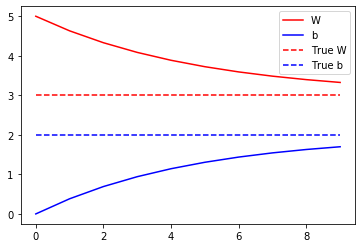

In [10]:
# Model Train Step 정의
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
    
# Model Training
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %(epoch, Ws[-1], bs[-1], current_loss))

# Model Visualization
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

#### Example2: The Iris classification problem
Iris Dataset을 Classification하는 Model을 Customizing하여서 구축하는 것을 목표로 한다.  
다음과 같은 순서로서 구성된다.
1. Import and parse the dataset
2. Select the type of model
3. Train the model
4. Evaluate the model's effectiveness
5. Use the trained model to make predictions

<br>

**Parse the dataset**  
실질적인 Raw Dataset을 다운받고 Feature와 Label로서 분류한다.  
Label은 꽃의 종류를 비교하는 Species가 되고 종류는 다음과 같다.
- 0: Iris setosa
- 1: Iris vesicolor
- 2: Iris virginica



In [11]:
# Download Dataset
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)
print("Local copy of the dataset file: {}".format(train_dataset_fp))

# Inspect the data
!head {train_dataset_fp}

# Define Feature and Label
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv
120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


**tf.data**  
<a href="https://wjddyd66.github.io/tnesorflow2.0/Tensorflow2.0(3)/">Load and preprocess Data</a>에서 설명한 <code>tf.data</code>를 활용하여 Dataset을 가공하여 Model에 넣은 Input Dataset으로서 구축한다.

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
Use tf.data.experimental.make_csv_dataset()
Feature
OrderedDict([('sepal_length', <tf.Tensor: id=1450, shape=(32,), dtype=float32, numpy=
array([5. , 6.5, 5.1, 7.9, 6.4, 5.5, 5.4, 5.9, 5.6, 4.6, 4.9, 5.2, 4.9,
       6.1, 4.9, 5. , 6.7, 5.4, 5.1, 5.9, 7.7, 4.8, 5.2, 5.7, 6.4, 4.9,
       4.6, 6.1, 5. , 6.2, 6.3, 4.8], dtype=float32)>), ('sepal_width', <tf.Tensor: id=1451, shape=(32,), dtype=float32, numpy=
array([3.4, 3. , 3.8, 3.8, 3.1, 2.4, 3.9, 3. , 2.5, 3.2, 2.4, 3.4, 2.5,
       2.8, 3.1, 3.6, 3.1, 3.4, 3.7, 3.2, 2.8, 3.1, 2.7, 2.8, 2.8, 3.1,
       3.1, 2.6, 3.5, 3.4, 2.3, 3.4], dtype=float32)>), ('petal_length', <tf.Tensor: id=1448, shape=(32,), dtype=float32, numpy=
array([1.6, 5.8, 1.5, 6.4, 5.5, 3.8, 1.7, 5.1, 3.9, 1.4, 3.3, 1.4, 4.5,
       

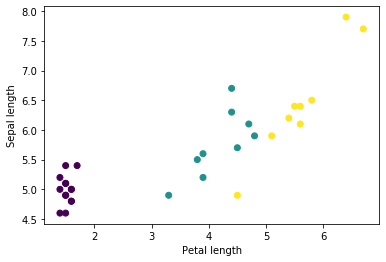

Use tf.stack
Feature
tf.Tensor(
[[6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.6 3.  4.4 1.4]
 [6.  2.2 5.  1.5]
 [5.4 3.9 1.3 0.4]], shape=(5, 4), dtype=float32)
Labels
tf.Tensor([2 2 1 2 0], shape=(5,), dtype=int32)


In [12]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

features, labels = next(iter(train_dataset))
print('Use tf.data.experimental.make_csv_dataset()')
print('Feature')
print(features)
print('Labels')
print(labels)
print()

# Visualization
scatter=plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

# tf.stack
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

train_dataset = train_dataset.map(pack_features_vector)
print('Use tf.stack')
features, labels = next(iter(train_dataset))
print('Feature')
print(features[:5])
print('Labels')
print(labels[:5])

**Build the model**  
실제 Training을 할 Model을 설정한다.  
Dense Layer로서 Fully-Connected Neural Network를 Build한다. 이러한 Model을 살펴보면 아래 그림과 같다.  
<img src="https://www.tensorflow.org/images/custom_estimators/full_network.png"><br>
사진 출처: <a href="https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough">Tensroflow 2.0 Customization</a><br>

In [13]:
# Build the Model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

# Prediction of Model(Not Train)
predictions = model(features)
print('Output of Model(Not Train)')
print(predictions[:5])
print()

# Prediction
print('Prediction')
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Output of Model(Not Train)
tf.Tensor(
[[ 0.82737595 -1.6107763  -0.11747895]
 [ 0.8870605  -1.5659739  -0.28924772]
 [ 0.5351423  -1.2628905  -0.02596872]
 [ 0.60821855 -1.362939   -0.10138126]
 [ 0.30034122 -0.7506314   0.67755103]], shape=(5, 3), dtype=float32)

Prediction
Prediction: [0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 2 2 2 0 2 2]
    Labels: [2 2 1 2 0 2 0 2 0 1 0 0 2 1 2 2 2 2 0 1 0 1 0 1 0 0 0 0 0 1 0 0]


**Train the model**  
Gradient Function정의, LossFunction 정의, Optimizer 정의

In [14]:
# Loss Object 선언
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Loss Function 정의
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels)
print("Loss test: {}".format(l))

# Gradient 정의
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

# Optimizer 정의
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training 결과 확인
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Loss test: 1.4487680196762085
Step: 0, Initial Loss: 1.4487680196762085
Step: 1,         Loss: 1.4180151224136353


**Training**  
지정한 Epoch만큼 Model Training 진행

In [15]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.466, Accuracy: 0.833%
Epoch 050: Loss: 0.577, Accuracy: 85.833%
Epoch 100: Loss: 0.302, Accuracy: 96.667%
Epoch 150: Loss: 0.192, Accuracy: 97.500%
Epoch 200: Loss: 0.136, Accuracy: 98.333%


**Result Visualization**

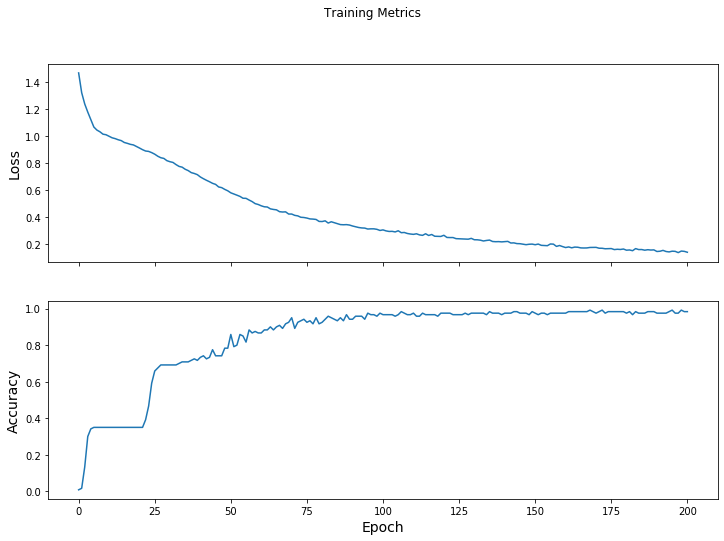

In [16]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

#### Evaluate the model's effectiveness
Train된 Model을 평가하기 위해서 Training Dataset이 아닌 Test Dataset을 다시 구축하고 평가를 한다.

In [17]:
# Test Dataset Download
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

# Split the Test Dataset Feature and Label
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

# Evaluate the model's effectiveness
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
